<a href="https://colab.research.google.com/github/RareDiseaseData/rd_simulations/blob/main/RD_Sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Meta-analysis simulation of data

## Libraries

In [306]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Just for clarity
import warnings
warnings.filterwarnings("ignore")

## Load data

In [307]:
df = pd.read_csv('/content/meta-analysis.csv')
df.drop(columns = ['species'], inplace = True)
df.columns = ['id', 'author', 'gender', 'health', 'control',
       'intervention', 'marker', 'age', 'timepoint', 'outcome_unit', 'n',
       'mean', 'sd', 'se', 'min', 'max', 'median', 't_score']
df

,id,author,gender,health,control,intervention,marker,age,timepoint,outcome_unit,n,mean,sd,se,min,max,median,t_score
0,60,"Brunetti et al., 2016",MF,Health age match,NaN,x,sCTX5,8.23 y ± 3.19,no treatment,ng/ml,21.0,1.570,0.460000,NaN,NaN,NaN,NaN,NaN
1,63,"Iwamoto et al., 2002",NaN,Healthy (ref),NaN,x,uNTX,NaN,No treatment,nmol/mmol Cr,NaN,43.000,8.351647,NaN,13.00,73.00,NaN,NaN
2,48,"Semler et al., 2012",M,Healthy (ref),NaN,x,uDPD,9.4 y,no treatment,nM/mM Cr,NaN,17.335,5.164301,NaN,6.40,28.27,NaN,NaN
3,48,"Semler et al., 2012",M,Healthy (ref),NaN,x,uDPD,6.9 y,no treatment,nM/mM Cr,NaN,17.335,5.164301,NaN,6.40,28.27,NaN,NaN
4,48,"Semler et al., 2012",M,Healthy (ref),NaN,x,uDPD,18.5 y,no treatment,nM/mM Cr,NaN,16.770,5.084535,NaN,6.15,27.39,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,11,"Pressac et al., 2002",MF,"I, III, IV","yes, ref control?",x,uCTX,<4,pretreatment,T-score,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.995935
91,11,"Pressac et al., 2002",MF,"I, III, IV","yes, ref control?",x,uCTX,<4,pretreatment,T-score,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.569106
92,11,"Pressac et al., 2002",MF,"I, III, IV","yes, ref control?",x,uCTX,<4,pretreatment,T-score,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.426829
93,11,"Pressac et al., 2002",MF,"I, III, IV","yes, ref control?",x,uCTX,<4,pretreatment,T-score,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.794038


In [308]:
df.dtypes

id                int64
author           object
gender           object
health           object
control          object
intervention     object
marker           object
age              object
timepoint        object
outcome_unit     object
n               float64
mean            float64
sd              float64
se              float64
min             float64
max             float64
median           object
t_score         float64
dtype: object

## Simulation

- `value`: From normal distribution based on mean and standard deviation
- `gender`: From normal distribution where not specified

In [309]:
simulated = []
for i, r in df.iterrows():
  if np.isnan(r.n):
    continue
  for j in range(int(r.n)):
    if r.gender == 'M':
      gender = 'M'
    elif r.gender == 'F':
      gender = 'F'
    else: # MF, NA and others, are random
      gender = np.random.choice(['M', 'F'])
    d = {
      'author' : r.author,
      'gender' : gender,
      'health' : r.health,
      'control' : r.control,
      'intervention' : r.intervention,
      'marker' : r.marker,
      'age' : r.age,
      'timepoint' : r.timepoint,
      'outcome_unit' : r.outcome_unit,
      'value' : np.random.normal(r['mean'], r['sd'], 1)[0],
      't_score' : r.t_score
    }
    simulated.append(d)
df_simulated = pd.DataFrame(simulated)

## Preprocessing age

In [310]:
df_simulated.age.unique()

array(['8.23 y ± 3.19', '1 y', '2 y', '3 y', '4 y', '5 y', '6 y', '7 y',
       '8 y', '9 y', '10 y', '11 y', '12 y', '13 y', '14 y', '15 y',
       '16 y', '17 y', '58 y', '4.4 y ± 1.8', '5.30 y ±1.5',
       '4.20 y ±1.1', '4  y', '9m-13 y ', '7.0 y (5.0 – 11.0) ', '8.6 y',
       '8.86  y ± 3.90 ', '1.4 - 17.5 y ', '42 y', '40 y', '0 y',
       '2-15 y (mean 7.5, SD 3.7)', '9.4 y', '6.9 y', '18.5 y', '5-17 y',
       '<4'], dtype=object)

In [311]:
df_simulated.age = df_simulated.age.str.replace('y', '')
df_simulated.age = df_simulated.age.str.replace(' ', '')
df_simulated.age.unique()

array(['8.23±3.19', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '58', '4.4±1.8',
       '5.30±1.5', '4.20±1.1', '9m-13', '7.0(5.0–11.0)', '8.6',
       '8.86±3.90', '1.4-17.5', '42', '40', '0', '2-15(mean7.5,SD3.7)',
       '9.4', '6.9', '18.5', '5-17', '<4'], dtype=object)

In [312]:
t = df_simulated[df_simulated.age.str.contains('±')]
t = t.age.str.split('±')
t

0       [8.23, 3.19]
1       [8.23, 3.19]
2       [8.23, 3.19]
3       [8.23, 3.19]
4       [8.23, 3.19]
            ...     
1104    [8.86, 3.90]
1105    [8.86, 3.90]
1106    [8.86, 3.90]
1107    [8.86, 3.90]
1108    [8.86, 3.90]
Name: age, Length: 75, dtype: object

In [313]:
# [ ] From normal distribution?
for i in t.iteritems():
  indice = i[0]
  mu = float(i[1][0])
  sigma = float(i[1][1])
  t[i[0]] = round(np.random.normal(mu, sigma, 1)[0])
t

0       11
1        8
2       10
3        7
4        7
        ..
1104    15
1105     8
1106     9
1107     4
1108    13
Name: age, Length: 75, dtype: object

In [314]:
df_simulated.loc[t.index, 'age'] = t
df_simulated

,author,gender,health,control,intervention,marker,age,timepoint,outcome_unit,value,t_score
0,"Brunetti et al., 2016",M,Health age match,NaN,x,sCTX5,11,no treatment,ng/ml,1.743813,NaN
1,"Brunetti et al., 2016",F,Health age match,NaN,x,sCTX5,8,no treatment,ng/ml,1.002854,NaN
2,"Brunetti et al., 2016",F,Health age match,NaN,x,sCTX5,10,no treatment,ng/ml,1.527691,NaN
3,"Brunetti et al., 2016",M,Health age match,NaN,x,sCTX5,7,no treatment,ng/ml,1.133160,NaN
4,"Brunetti et al., 2016",M,Health age match,NaN,x,sCTX5,7,no treatment,ng/ml,1.960783,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1191,"Pressac et al., 2002",F,"I, III, IV","yes, ref control?",x,uCTX,<4,pretreatment,T-score,NaN,-0.995935
1192,"Pressac et al., 2002",F,"I, III, IV","yes, ref control?",x,uCTX,<4,pretreatment,T-score,NaN,-0.569106
1193,"Pressac et al., 2002",M,"I, III, IV","yes, ref control?",x,uCTX,<4,pretreatment,T-score,NaN,0.426829
1194,"Pressac et al., 2002",F,"I, III, IV","yes, ref control?",x,uCTX,<4,pretreatment,T-score,NaN,3.794038


In [315]:
df_simulated.age.unique()

array([11, 8, 10, 7, 6, 4, 12, 16, 2, 5, 13, 3, '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '58', '9m-13', '7.0(5.0–11.0)', '8.6', 1, 9, 15, '1.4-17.5', '42',
       '40', '0', '2-15(mean7.5,SD3.7)', '9.4', '6.9', '18.5', '5-17',
       '<4'], dtype=object)

In [316]:
t = df_simulated[df_simulated.age == '7.0(5.0–11.0)']
for i in t.iteritems():
  # [ ] 5 <= age , 12 ? 
  t[i[0]] = np.random.randint(5, 12)
df_simulated.loc[t.index, 'age'] = t
df_simulated.age.unique()

array([11, 8, 10, 7, 6, 4, 12, 16, 2, 5, 13, 3, '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '58', '9m-13', '8.6', 1, 9, 15, '1.4-17.5', '42', '40', '0',
       '2-15(mean7.5,SD3.7)', '9.4', '6.9', '18.5', '5-17', '<4'],
      dtype=object)

In [317]:
17.5 - 1.4

16.1

In [318]:
t = df_simulated[df_simulated.age == '1.4-17.5']
for i in t.iteritems():
  t[i[0]] = round(np.random.rand(1)[0] * 16.1 + 1.4, 1)
df_simulated.loc[t.index, 'age'] = t
df_simulated.age.unique()

array([11, 8, 10, 7, 6, 4, 12, 16, 2, 5, 13, 3, '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '58', '9m-13', '8.6', 1, 9, 15, 4.6, '42', '40', '0',
       '2-15(mean7.5,SD3.7)', '9.4', '6.9', '18.5', '5-17', '<4'],
      dtype=object)

In [319]:
t = df_simulated[df_simulated.age == '2-15(mean7.5,SD3.7)']
for i in t.iteritems():
  t[i[0]] = round(np.random.normal(7.5, 3.7, 1)[0])
df_simulated.loc[t.index, 'age'] = t
df_simulated.age.unique()

array([11, 8, 10, 7, 6, 4, 12, 16, 2, 5, 13, 3, '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '58', '9m-13', '8.6', 1, 9, 15, 4.6, '42', '40', '0', '9.4', '6.9',
       '18.5', '5-17', '<4'], dtype=object)

In [320]:
t = df_simulated[df_simulated.age == '5-17']
for i in t.iteritems():
  t[i[0]] = np.random.randint(5, 18)
df_simulated.loc[t.index, 'age'] = t
df_simulated.age.unique()

array([11, 8, 10, 7, 6, 4, 12, 16, 2, 5, 13, 3, '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '58', '9m-13', '8.6', 1, 9, 15, 4.6, '42', '40', '0', '9.4', '6.9',
       '18.5', '<4'], dtype=object)

In [321]:
9 / 12

0.75

In [322]:
13 - 0.75

12.25

In [323]:
# [ ] Are this months?
t = df_simulated[df_simulated.age == '9m-13']
for i in t.iteritems():
  t[i[0]] = round(np.random.rand(1)[0] * 12.25 + 0.75, 1)
df_simulated.loc[t.index, 'age'] = t
df_simulated.age.unique()

array([11, 8, 10, 7, 6, 4, 12, 16, 2, 5, 13, 3, '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '58', 0.8, '8.6', 1, 9, 15, 4.6, '42', '40', '0', '9.4', '6.9',
       '18.5', '<4'], dtype=object)

In [324]:
# [ ] I'm supposing this are years 😬
t = df_simulated[df_simulated.age == '<4']
for i in t.iteritems():
  t[i[0]] = round(np.random.rand(1)[0] * 4, 1)
df_simulated.loc[t.index, 'age'] = t
df_simulated.age.unique()

array([11, 8, 10, 7, 6, 4, 12, 16, 2, 5, 13, 3, '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '58', 0.8, '8.6', 1, 9, 15, 4.6, '42', '40', '0', '9.4', '6.9',
       '18.5', 3.6], dtype=object)

In [325]:
df_simulated.age = df_simulated.age.astype('float')

In [326]:
df_simulated

,author,gender,health,control,intervention,marker,age,timepoint,outcome_unit,value,t_score
0,"Brunetti et al., 2016",M,Health age match,NaN,x,sCTX5,11.0,no treatment,ng/ml,1.743813,NaN
1,"Brunetti et al., 2016",F,Health age match,NaN,x,sCTX5,8.0,no treatment,ng/ml,1.002854,NaN
2,"Brunetti et al., 2016",F,Health age match,NaN,x,sCTX5,10.0,no treatment,ng/ml,1.527691,NaN
3,"Brunetti et al., 2016",M,Health age match,NaN,x,sCTX5,7.0,no treatment,ng/ml,1.133160,NaN
4,"Brunetti et al., 2016",M,Health age match,NaN,x,sCTX5,7.0,no treatment,ng/ml,1.960783,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1191,"Pressac et al., 2002",F,"I, III, IV","yes, ref control?",x,uCTX,3.6,pretreatment,T-score,NaN,-0.995935
1192,"Pressac et al., 2002",F,"I, III, IV","yes, ref control?",x,uCTX,3.6,pretreatment,T-score,NaN,-0.569106
1193,"Pressac et al., 2002",M,"I, III, IV","yes, ref control?",x,uCTX,3.6,pretreatment,T-score,NaN,0.426829
1194,"Pressac et al., 2002",F,"I, III, IV","yes, ref control?",x,uCTX,3.6,pretreatment,T-score,NaN,3.794038


## Outcome conversion (pending)

In [327]:
# [ ] What should we do here?
# 776.87 g/mol * (1 mole / 10^-12 picomole)
# et cetera?
df_simulated.outcome_unit.unique()

array(['ng/ml', 'picomole/micromole CR', 'nmol/mmol Cr ', 'nmolBCE/l ',
       'ug/g Cr', 'mmol/mmol Cr', 'nmol/mmol CR', 'nmol BCE/mmol Cr ',
       'nM/mM Cr', ' ng/ml', 'T-score'], dtype=object)

## $T$-score (pending)

In [328]:
# [ ] What should we do with t_score rows?
df_simulated[~df_simulated.t_score.isna()]

,author,gender,health,control,intervention,marker,age,timepoint,outcome_unit,value,t_score
1189,"Pressac et al., 2002",F,"I, III, IV","yes, ref control?",x,uCTX,3.6,pretreatment,T-score,NaN,-2.228997
1190,"Pressac et al., 2002",F,"I, III, IV","yes, ref control?",x,uCTX,3.6,pretreatment,T-score,NaN,-1.470190
1191,"Pressac et al., 2002",F,"I, III, IV","yes, ref control?",x,uCTX,3.6,pretreatment,T-score,NaN,-0.995935
1192,"Pressac et al., 2002",F,"I, III, IV","yes, ref control?",x,uCTX,3.6,pretreatment,T-score,NaN,-0.569106
1193,"Pressac et al., 2002",M,"I, III, IV","yes, ref control?",x,uCTX,3.6,pretreatment,T-score,NaN,0.426829
1194,"Pressac et al., 2002",F,"I, III, IV","yes, ref control?",x,uCTX,3.6,pretreatment,T-score,NaN,3.794038
1195,"Pressac et al., 2002",F,"I, III, IV","yes, ref control?",x,uCTX,3.6,pretreatment,T-score,NaN,5.216802


In [329]:
# Value is a number
df_final = df_simulated[~df_simulated.value.isna()]
df_final

,author,gender,health,control,intervention,marker,age,timepoint,outcome_unit,value,t_score
0,"Brunetti et al., 2016",M,Health age match,NaN,x,sCTX5,11.0,no treatment,ng/ml,1.743813,NaN
1,"Brunetti et al., 2016",F,Health age match,NaN,x,sCTX5,8.0,no treatment,ng/ml,1.002854,NaN
2,"Brunetti et al., 2016",F,Health age match,NaN,x,sCTX5,10.0,no treatment,ng/ml,1.527691,NaN
3,"Brunetti et al., 2016",M,Health age match,NaN,x,sCTX5,7.0,no treatment,ng/ml,1.133160,NaN
4,"Brunetti et al., 2016",M,Health age match,NaN,x,sCTX5,7.0,no treatment,ng/ml,1.960783,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1172,"Zacharin & Kanumakala, 2004",F,mild,no,x,uDPD,9.0,baseline,nmol/mmol Cr,33.633108,NaN
1173,"Zacharin & Kanumakala, 2004",M,mild,no,x,uDPD,9.0,baseline,nmol/mmol Cr,25.793676,NaN
1174,"Zacharin & Kanumakala, 2004",F,mild,no,x,uDPD,9.0,baseline,nmol/mmol Cr,21.236011,NaN
1175,"Zacharin & Kanumakala, 2004",M,mild,no,x,uDPD,9.0,baseline,nmol/mmol Cr,18.465284,NaN


## Data description

### Gender

In [330]:
df_final.gender.unique()

array(['M', 'F'], dtype=object)

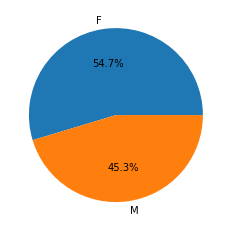

In [331]:
gender_freq = df_final.groupby('gender').size()
plt.figure()
plt.pie(gender_freq, labels = gender_freq.index, autopct='%1.1f%%')
plt.show()

### Age

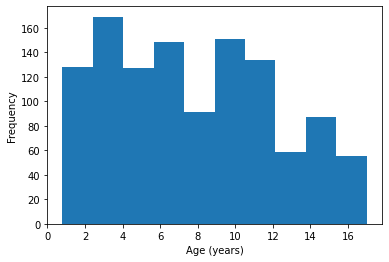

In [332]:
plt.figure()
plt.hist(df_final.age)
plt.ylabel('Frequency')
plt.xlabel('Age (years)')
plt.show()

### Control

In [333]:
df_final.control.unique()

array([nan, 'no ', 'no (Brunetti 2016?)', 'no', 'yes',
       'yes, ref control?'], dtype=object)

In [334]:
df_final[(df_final.control == 'no ') | (df_final.control == 'no (Brunetti 2016?)')] = 'no'
df_final[df_final.control == 'yes, ref control?'] = 'yes'
df_final.control.unique()

array([nan, 'no', 'yes'], dtype=object)

In [335]:
control_freq = df_final.groupby('control').size()
control_freq

control
no     99
yes    62
dtype: int64

In [336]:
# nans
df_final.control.isna().count()

1149

In [337]:
nan_series = pd.Series(df_final.control.isna().count(), index = ['nan'])
nan_series

nan    1149
dtype: int64

In [338]:
control_freq = pd.concat([control_freq, nan_series])
control_freq

no       99
yes      62
nan    1149
dtype: int64

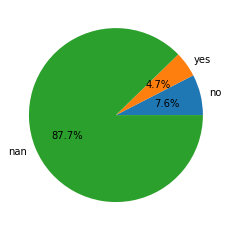

In [339]:
plt.figure()
plt.pie(control_freq, labels = control_freq.index, autopct='%1.1f%%')
plt.show()

### Marker

In [340]:
marker_freq = df_final.groupby('marker').size()
marker_freq.sort_values(ascending = False, inplace = True)
marker_freq

marker
uNTX     967
yes       44
no        36
sNTX      36
uDPD      27
sCTX5     21
sCTX6     18
dtype: int64

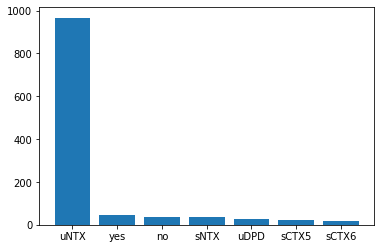

In [341]:
plt.figure()
plt.bar(marker_freq.index, marker_freq)
plt.show()

### Value (multiple units 😅)

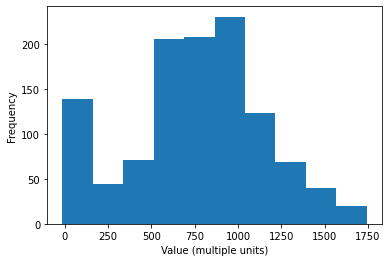

In [264]:
plt.figure()
plt.hist(df_final.value)
plt.ylabel('Frequency')
plt.xlabel('Value (multiple units)')
plt.show()